In [1]:
import os
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [2]:
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt



df = pd.read_csv('/gdrive/My Drive/DS/dataset.csv')

df.dtypes

df.info()

df.head()

df.tail(10)

df.sample(frac=.01)

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [3]:
to_drop = ['step',
           'isFlaggedFraud','nameOrig', 'nameDest']

df.drop(to_drop, inplace = True, axis = 1)
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [4]:
#check null values
df.isna().sum().sum()

0

In [5]:
df.duplicated(keep='first').any()

True

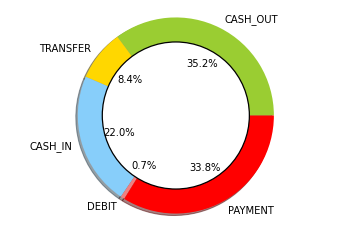

In [6]:
cashoutOcurrency  = df.loc[df['type'] == 'CASH_OUT'].shape[0]/df.shape[0]
trasnferOcurrency = df.loc[df['type'] == 'TRANSFER'].shape[0]/df.shape[0]
cashinOcurrency   = df.loc[df['type'] == 'CASH_IN'].shape[0]/df.shape[0]
debitOcurrency    = df.loc[df['type'] == 'DEBIT'].shape[0]/df.shape[0]
paymentOcurrency    = df.loc[df['type'] == 'PAYMENT'].shape[0]/df.shape[0]

labels = 'CASH_OUT', 'TRANSFER', 'CASH_IN', 'DEBIT','PAYMENT'
sizes = [cashoutOcurrency, trasnferOcurrency,cashinOcurrency, debitOcurrency,paymentOcurrency]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','red']

explode = (0, 0, 0, 0,0)  # explode a slice if required

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
        
#desenha um circulo no meio do piechart
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.axis('equal')
plt.show() 

In [7]:
df1=df.sample(n=1000, random_state=1)
df1=df.sort_index()
df1=df.reset_index(drop=True)
df1.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [8]:
#Covernt to numbers of labelled data in 'type'
df1.loc[df.type == 'CASH_OUT', 'type'] = 1
df1.loc[df.type == 'TRANSFER', 'type'] = 2
df1.loc[df.type == 'CASH_IN', 'type'] = 3
df1.loc[df.type == 'PAYMENT', 'type'] = 4
df1.loc[df.type == 'DEPIT', 'type'] = 5
df1.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,4,9839.64,170136.0,160296.36,0.0,0.0,0
1,4,1864.28,21249.0,19384.72,0.0,0.0,0
2,2,181.00,181.0,0.00,0.0,0.0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1
4,4,11668.14,41554.0,29885.86,0.0,0.0,0


In [9]:
from sklearn.model_selection import train_test_split # import train_test_split function
from sklearn.linear_model import LogisticRegression # import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score # import accuracy metrics
from sklearn.ensemble import RandomForestClassifier #import RandomForestClassifier
from sklearn import svm  #import support vector machine classifier
import xgboost as xgb  
from xgboost import  XGBClassifier  #import xgboost classifier 
from sklearn.neighbors import KNeighborsClassifier #import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV # import GridSearchCV
# suppress all warnings
import warnings
warnings.filterwarnings("ignore")

In [10]:
#Slice the target and features from the dataset
features=df1.drop('isFraud', axis=1)
features=df1.drop('type', axis=1)
target =df1.isFraud

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [11]:
def machine_func (algoritm):
    #train and fit regression model
    model=algoritm()
    model.fit(X_train, y_train)

    # predict
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # evaluate
    train_accuracy = roc_auc_score(y_train, train_preds)
    test_accuracy = roc_auc_score(y_test, test_preds)
   

    print(str(algoritm))
    print("------------------------")
    print(f"Training Accuracy: {(train_accuracy * 100):.4}%")
    print(f"Test Accuracy:     {(test_accuracy * 100):.4}%")

    
    #score_logreg = [algoritm, train_accuracy, test_accuracy]
    #models = pd.DataFrame([score_logreg])

In [ ]:
algoritms=[LogisticRegression,RandomForestClassifier,KNeighborsClassifier]

#running each model and print accuracy scores
for algoritm in algoritms:
    machine_func(algoritm)

<class 'sklearn.linear_model._logistic.LogisticRegression'>
------------------------
Training Accuracy: 89.34%
Test Accuracy:     89.38%
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
------------------------
Training Accuracy: 100.0%
Test Accuracy:     100.0%
